In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymap3d as pm
import requests as req
import urllib


%matplotlib inline


In [3]:

a_lon = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_HS1_DYN_ABR_38D_ACCEL_LONGI_ROUES.csv', delimiter =';').to_numpy()
a_lat = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_IS_DYN2_FRE_3CD_ACCEL_LAT.csv', delimiter =';', usecols = [0, 1]).to_numpy()
v_lon = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_HS1_DYN_ABR_38D_VITESSE_VEHICULE_ROUES.csv', delimiter =';').to_numpy()
angle_volant = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_HS1_DYN_VOL_305_ANGLE_VOLANT.csv', delimiter =';').to_numpy()
v_lacet = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_IS_DYN2_FRE_3CD_VITESSE_LACET.csv', delimiter =';', usecols = [0, 1]).to_numpy()
v_roue_ard_nf = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_IS_DYN4_FRE_30D_VITESSE_ROUE_ARD_NF.csv', delimiter =';').to_numpy()
v_roue_arg_nf = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_IS_DYN4_FRE_30D_VITESSE_ROUE_ARG_NF.csv', delimiter =';').to_numpy()
#v_roue_avd_nf = pd.read_csv('RecFile_1_20231218_173949_CANDecoder_1_HS1_DYN4_FRE_30D_VITESSE_ROUE_AVD_NF.csv', delimiter =';').to_numpy()
#v_roue_avg_nf = pd.read_csv('RecFile_1_20231218_173949__CANDecoder_1_HS1_DYN4_FRE_30D_VITESSE_ROUE_AVG_NF.csv', delimiter =';').to_numpy()
gnss_pos_lat_lon = pd.read_csv('RecFile_1_20231218_173949_GPS_NMEA0183_1_oPosition.csv', delimiter =';').to_numpy()
#gnss_date_time = pd.read_csv('RecFile_1_20231218_173949_GNSS_LLA_UTC_date_and_time.csv', delimiter =';').to_numpy()

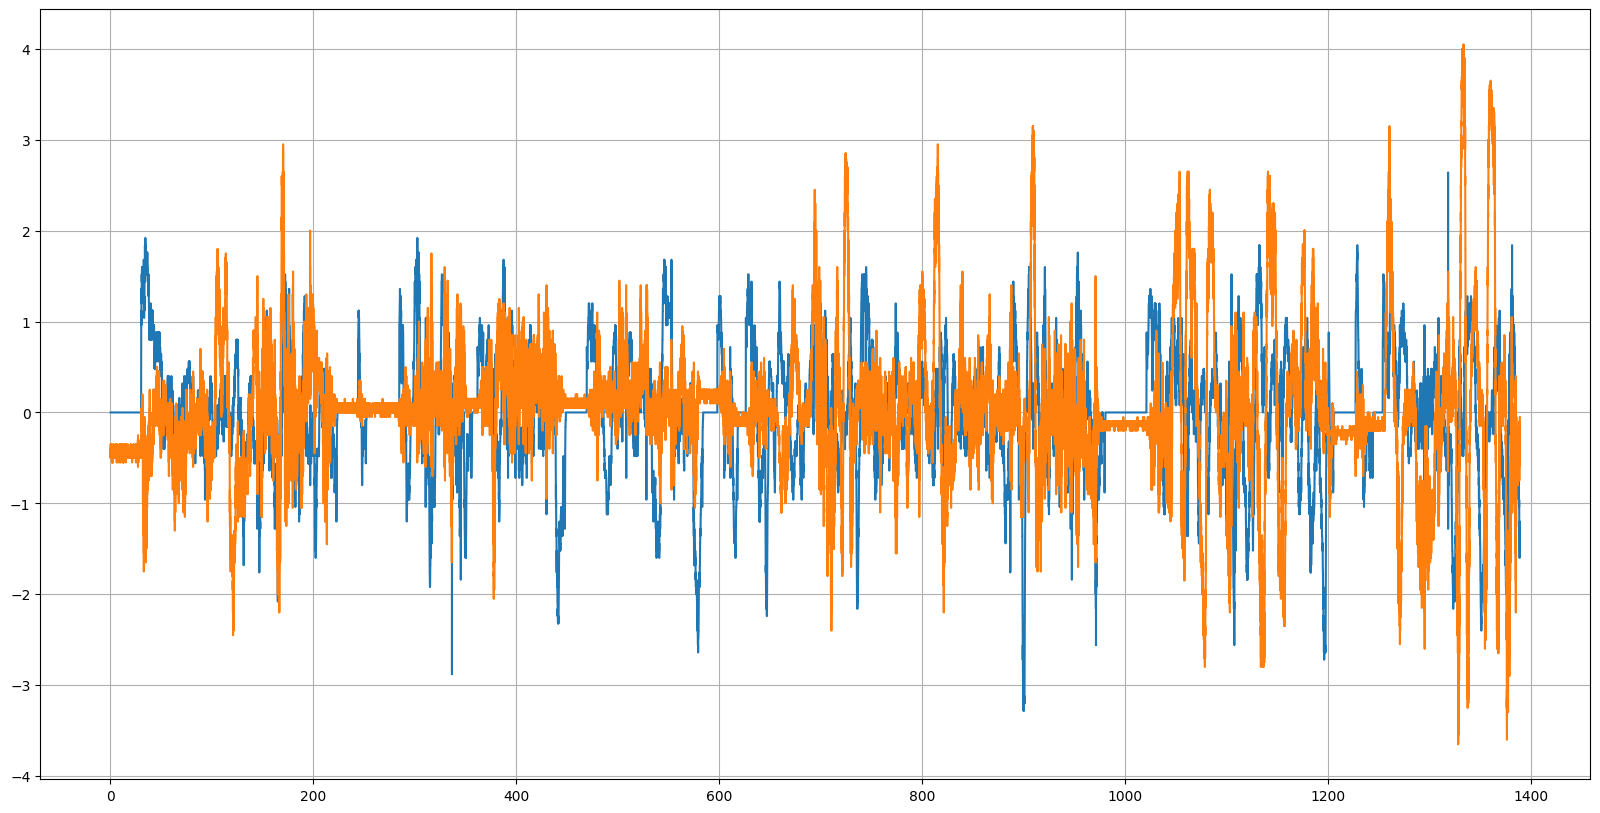

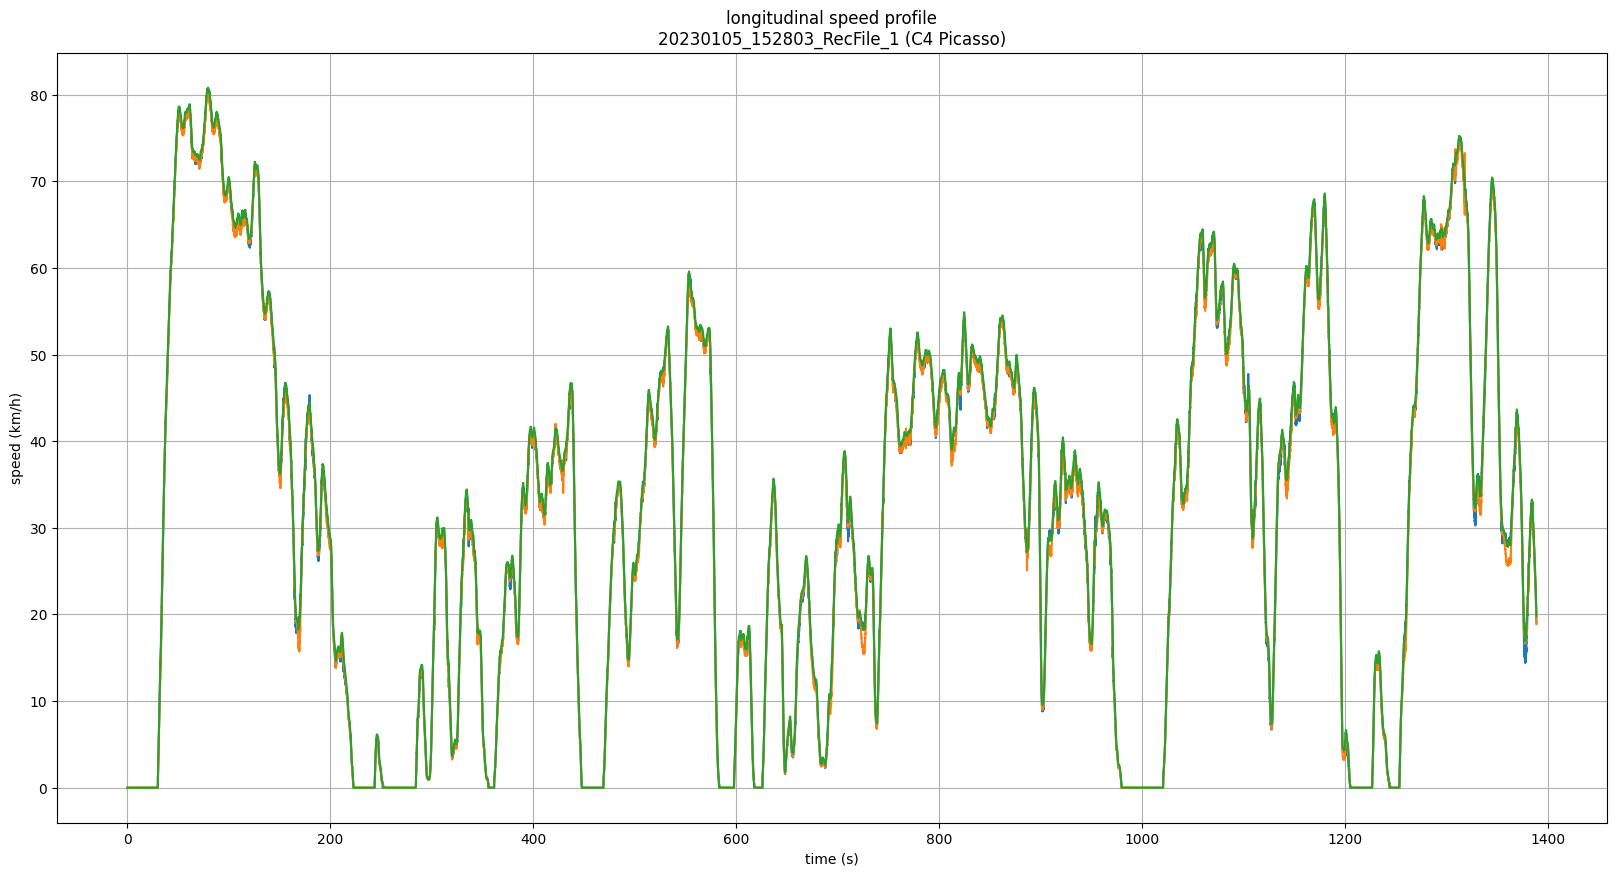

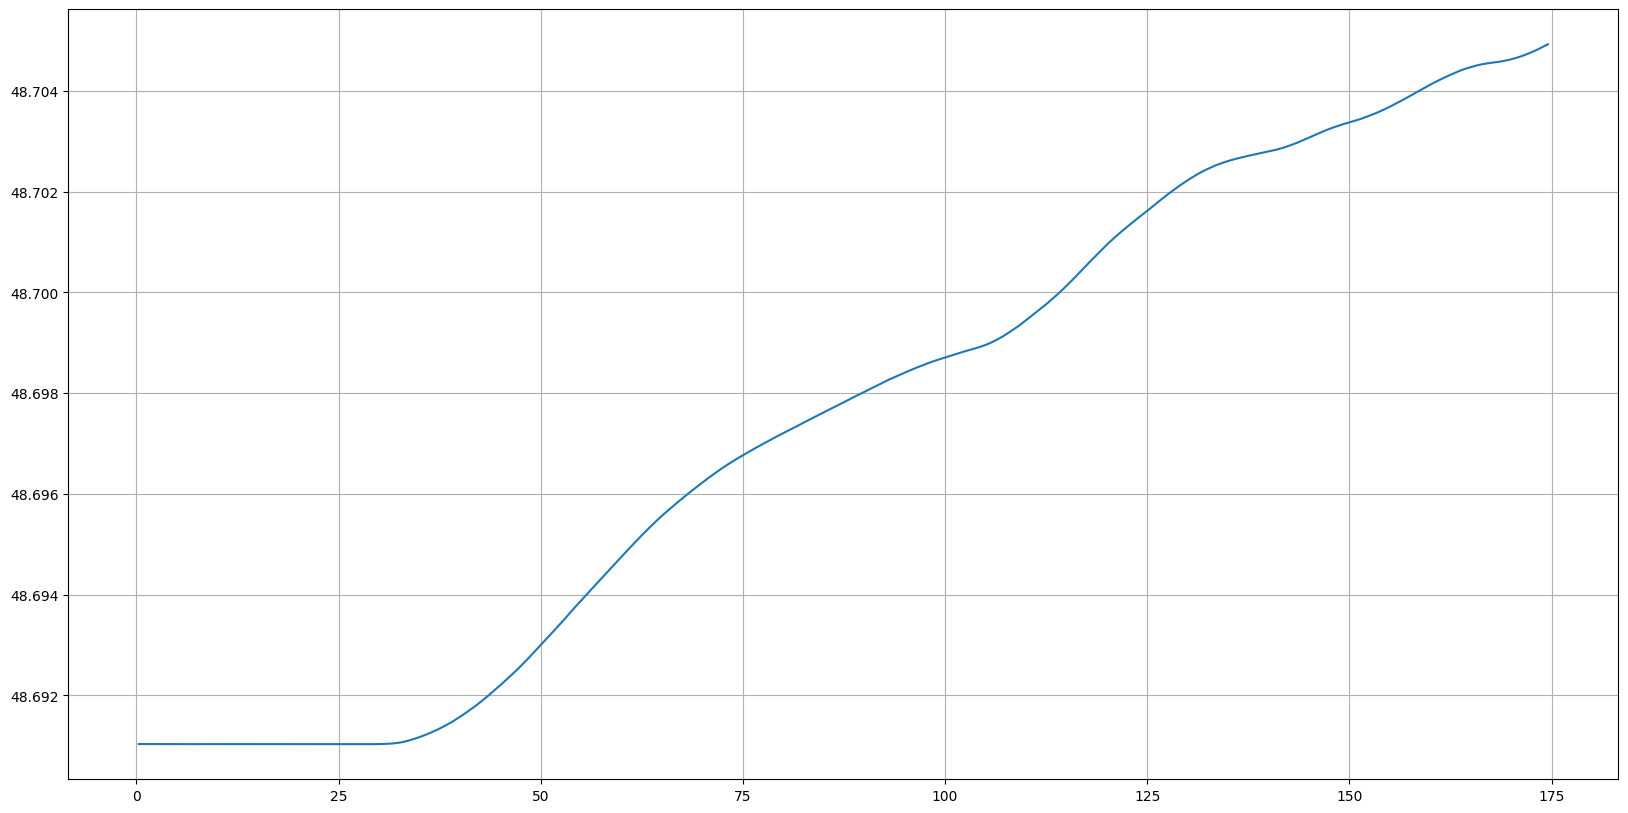

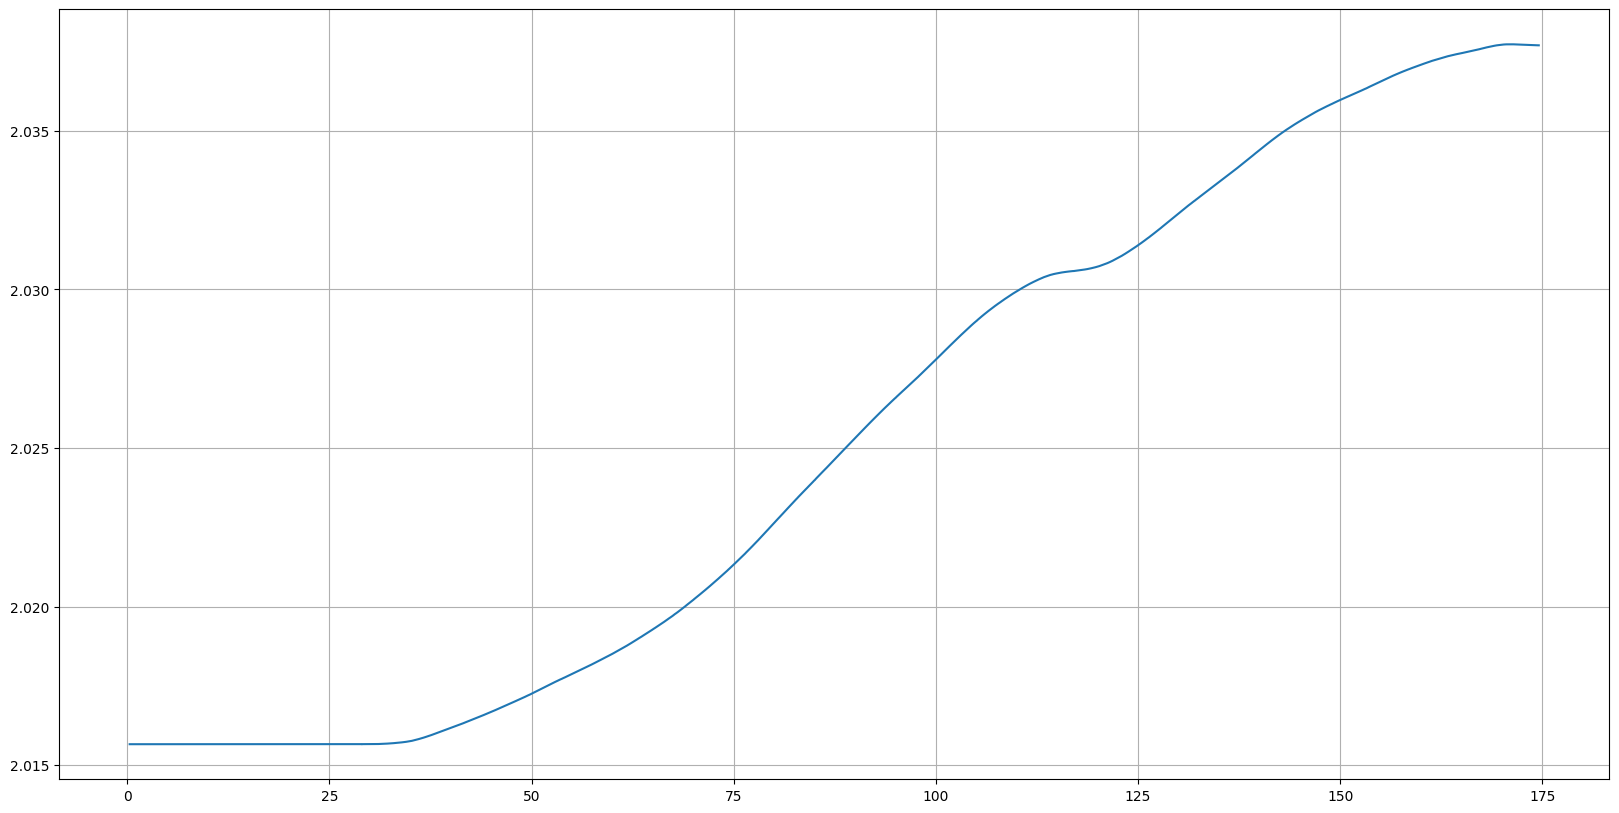

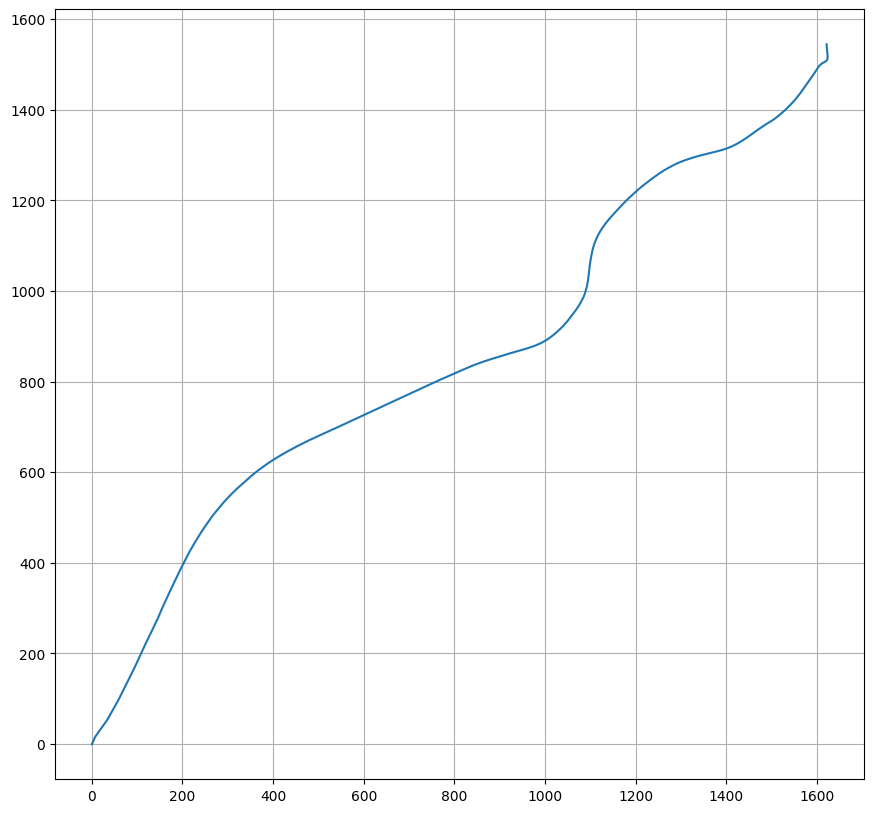

In [46]:

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(a_lon[:,0]/1e6, a_lon[:,1])
ax.plot(a_lat[:,0]/1e6, a_lat[:,1])
ax.grid()
fig, ax = plt.subplots(figsize = (20,10))
# ax.plot(v_roue_avd_nf[:,0]/1e6, v_roue_avd_nf[:,1])
# ax.plot(v_roue_avg_nf[:,0]/1e6, v_roue_avg_nf[:,1])
ax.plot(v_roue_ard_nf[:,0]/1e6, v_roue_ard_nf[:,1])
ax.plot(v_roue_arg_nf[:,0]/1e6, v_roue_arg_nf[:,1])
ax.plot(v_lon[:,0]/1e6, v_lon[:,1])
ax.grid()
ax.set_title('longitudinal speed profile\n20230105_152803_RecFile_1 (C4 Picasso)')
ax.set_ylabel('speed (km/h)')
ax.set_xlabel('time (s)')
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(gnss_pos_lat_lon[:,0]/1e6,gnss_pos_lat_lon[:,1])
ax.grid()
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(gnss_pos_lat_lon[:,0]/1e6,gnss_pos_lat_lon[:,2])
ax.grid()
lat = gnss_pos_lat_lon[:,1]
lon = gnss_pos_lat_lon[:,2]
ts_lat_lon = gnss_pos_lat_lon[:,0]
ts_v_roue_xxx_nf = v_roue_arg_nf[:,0]

url = 'https://wxs.ign.fr/calcul/alti/rest/elevation.json?'
str_lon = f'lon={lon[0]}'
str_lat = f'lat={lat[0]}'

for lati, longi in zip(lat[1:],lon[1:]):
   str_lon += f'|{longi}'
   str_lat += f'|{lati}'
   
url += str_lon + '&' + str_lat + '&zonly=true'

proxies = {
   'http': 'http.ntlm.internetpsa.inetpsa.com:8080',
   'https': 'http.ntlm.internetpsa.inetpsa.com:8080',
}

# result =req.get(url = url, proxies = proxies)
# alt = np.array(result.json()['elevations'])

# x,y,z = pm.geodetic2enu(lat,lon,alt,lat[0],lon[0],alt[0])
x,y,z = pm.geodetic2enu(lat,lon,0,lat[0],lon[0],0)

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x,y)
ax.set_aspect('equal')
ax.grid()

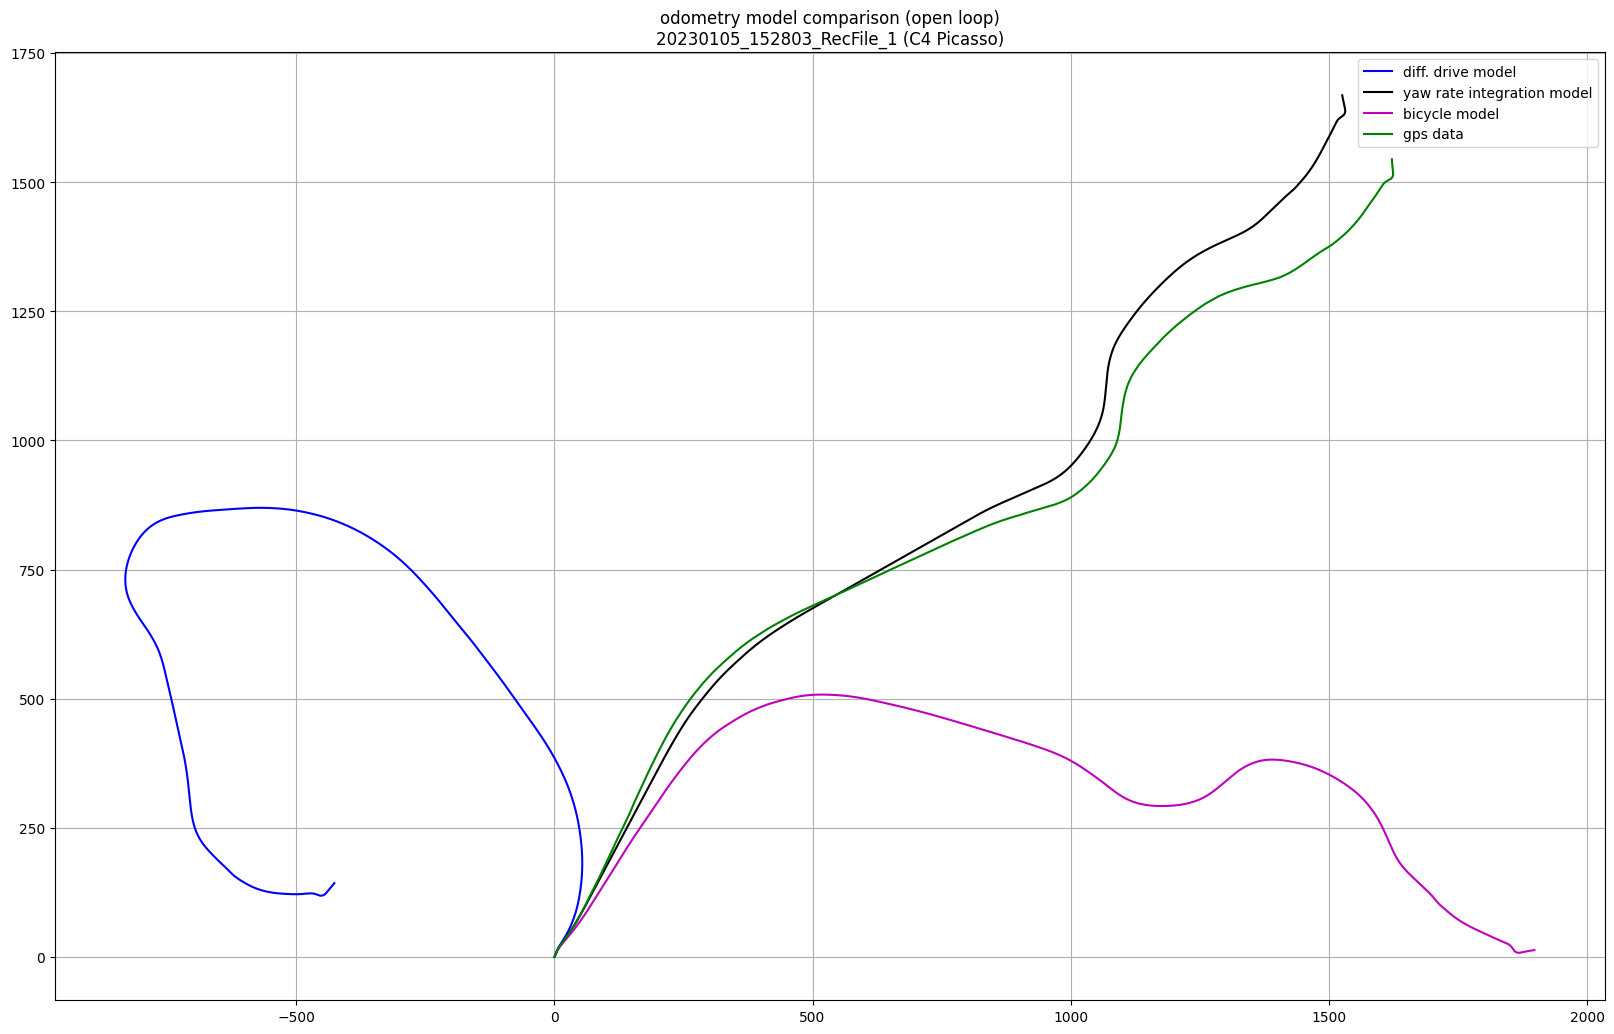

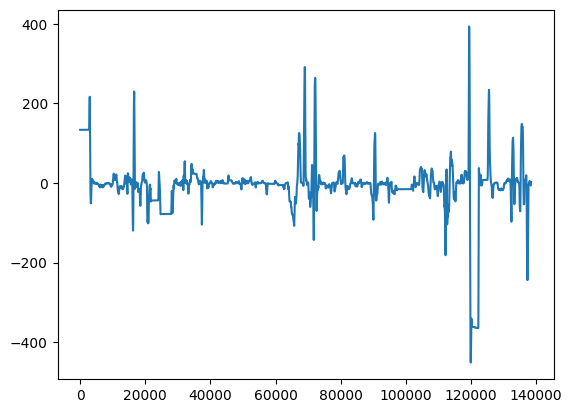

In [45]:
L = 1.59

nv_start = np.where(v_lacet[:,0]>=ts_lat_lon[0])[0][0]
N = len(v_lacet) - nv_start
Thv = np.zeros(N)

for n in range(1,N):
    dt = (v_lacet[nv_start + n,0] - v_lacet[nv_start+n-1,0])/1e6
    Thv[n] = Thv[n-1] + dt*v_lacet[nv_start+n-1,1]*np.pi/180
    
nv_start = np.where(angle_volant[:,0]>=ts_lat_lon[0])[0][0]
N = len(angle_volant) - nv_start
av = np.zeros(N)
av = angle_volant[nv_start:,1]*np.pi/180
    

nv_start = np.where(ts_v_roue_xxx_nf>=ts_lat_lon[0])[0][0]
nv_stop = np.where(ts_v_roue_xxx_nf>=ts_lat_lon[-1])[0][0]

N = nv_stop - nv_start + 1
xv = np.zeros(N)
yv = np.zeros(N)
xv2 = np.zeros(N)
yv2 = np.zeros(N)
xv3 = np.zeros(N)
yv3 = np.zeros(N)
thv = np.zeros(N)
thv2 = np.zeros(N)
thv3 = np.zeros(N)
thv[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180
thv2[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180
thv3[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180


for n in range(1,N):
    
    dt = (v_roue_arg_nf[nv_start+n,0] - v_roue_arg_nf[nv_start+n-1,0])/1e6
    v_g = v_roue_arg_nf[nv_start+n-1,1]/3.6
    v_d = v_roue_ard_nf[nv_start+n-1,1]/3.6

    xv[n] = xv[n-1] + dt*((v_g + v_d)/2)*np.cos(thv[n-1] + (dt*(v_d - v_g)/L)/2)
    yv[n] = yv[n-1] + dt*((v_g + v_d)/2)*np.sin(thv[n-1] + (dt*(v_d - v_g)/L)/2)
    thv[n] = thv[n-1] + dt*(v_d - v_g)/L
    
    
    dt = (v_roue_arg_nf[nv_start+n,0] - v_roue_arg_nf[nv_start+n-1,0])/1e6
    v_g = v_roue_arg_nf[nv_start+n-1,1]/3.6
    v_d = v_roue_ard_nf[nv_start+n-1,1]/3.6

    xv2[n] = xv2[n-1] + dt*((v_g + v_d)/2)*np.cos((thv2[n-1] + thv2[0] + Thv[2*(n-1)])/2)
    yv2[n] = yv2[n-1] + dt*((v_g + v_d)/2)*np.sin((thv2[n-1] + thv2[0] + Thv[2*(n-1)])/2)
    thv2[n] = thv2[0] + Thv[2*(n-1)]
    
    # thv3[n] = thv3[n-1] + dt*(v_d - v_g)/L
    # if np.abs(v_d - v_g) > 1e-8:
    #     xv3[n] = xv3[n-1] + ((v_g + v_d)/2)*(np.sin(thv3[n])-np.sin(thv3[n-1]))/((v_d - v_g)/L)
    #     yv3[n] = yv3[n-1] - ((v_g + v_d)/2)*(np.cos(thv3[n])-np.cos(thv3[n-1]))/((v_d - v_g)/L)
    # else:
    #     xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1] + (dt*(v_d - v_g)/L)/2)
    #     yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1] + (dt*(v_d - v_g)/L)/2)
    
 
    
    # xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1])
    # yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1])
    # thv3[n] = thv3[n-1] + dt*(v_d - v_g)/L
    l = 2.84
    lr = 0
    lf = l - lr
    sr = 1/15.86
    beta = np.arctan(lr*np.tan(sr*av[2*(n-1)])/l)
    thv3[n] = thv3[n-1] + dt*(((v_g + v_d)/2)/l)*np.cos(beta)*np.tan(sr*av[2*(n-1)])
    xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1] + beta)
    yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1] + beta)

    

fig, ax = plt.subplots(figsize = (20,20))
ax.plot(xv,yv,'b')
ax.plot(xv2,yv2,'k')
ax.plot(xv3,yv3,'m')

ax.plot(x,y,'g')
ax.legend(['diff. drive model','yaw rate integration model','bicycle model' ,'gps data'])
ax.set_aspect('equal')
ax.grid()
ax.set_title('odometry model comparison (open loop)\n20230105_152803_RecFile_1 (C4 Picasso)')


plt.figure()
plt.plot(av*180/np.pi)

In [ ]:
# This is template code. Please save it in a proper .py file.
import rtmaps.types
import numpy as np 
import rtmaps.core as rt
import rtmaps.reading_policy
from rtmpas.base_components imort BaseComponent # base class
import matplotlib.pyplot as plt


# Python class that will be called from RTMaps
class rtmaps_python(BaseComponent):
    def __init__(self):
        BaseComponent.__init__() # Call base class constructor
        
        # Define attributes 
        self.infos = {
            "v_lacet": [],
            "Tvh": []
        }
        
        self.two_latest_v_lacet_values = []
        self.two_latest_Thv_values = []
    
    def _add_values(self, list_name, value_to_add):
        assert list_name in ["Tvh", "v_lacet"], "list_name, must be in ['Tvh', 'v_lacet']"
        if len(self.infos[list_name]) < 2:
            self.infos[list_name].append()
            
        
        
    
    def Dynamic(self):
        
        # Define inputs of the component
        self.add_input(name="a_lon", type=rtmaps.types.ANY)
        self.add_input(name="a_lat", type=rtmaps.types.ANY)
        self.add_input(name="v_lon", type=rtmaps.types.ANY)
        self.add_input(name="angle_volant", type=rtmaps.types.ANY)
        self.add_input(name="v_lacet", type=rtmaps.types.ANY)
        self.add_input(name="v_roue_ard_nf", type=rtmaps.types.ANY)
        self.add_input(name="v_roue_arg_nf", type=rtmaps.types.ANY)
        self.add_input(name="gnss_pos_lat_lon", type=rtmaps.types.ANY)
        
        # Define outputs of the component
        self.add_output(name="xv", type=rtmaps.AUTO)
        self.add_output(name="yv", type=rtmaps.AUTO)
        self.add_output(name="xv2", type=rtmaps.AUTO)
        self.add_output(name="yv2", type=rtmaps.AUTO)
        self.add_output(name="xv3", type=rtmaps.AUTO)
        self.add_output(name="yv3", type=rtmaps.AUTO)
        
        # Define properties of the component
        self.add_property(name="L", value=1.59)
    
    # Birht() will be called once at diagram execution startup
    def Birth(self):
        print("Python Brith")
    
    # Core() is called evry time you have e new input
    def Core(self):
        L = self.get_property("L")
        gnss_pos_lat_lon = self.inputs["gnss_pos_lat_lon"].ioelt
        ts_lat_lon = gnss_pos_lat_lon[:, 0]
        v_lacet = self.inputs["v_lacet"].ioelt
        
        if self.two_latest_v_lacet_values[1] is None:
            self.two_latest_v_lacet_values[1] = v_lacet
        elif self.two_latest_v_lacet_values[0] is None:
            self.two_latest_v_lacet_values[0] = v_lacet
        else:
            self.two_latest_v_lacet_values[0], self.two_latest_v_lacet_values[1] = self.two_latest_v_lacet_values[1], v_lacet
            
            
        
        if (v_lacet[:,0] >= ts_lat_lon[0]):
            
            dt = (self.two_latest_v_lacet_values[1] - self.two_latest_v_lacet_values[0]) / 1e6
            Thv[n] = Thv[n-1] + dt*v_lacet[nv_start+n-1,1] * np.pi / 180
            
        nv_start = np.where(angle_volant[:,0]>=ts_lat_lon[0])[0][0]
        N = len(angle_volant) - nv_start
        av = np.zeros(N)
        av = angle_volant[nv_start:,1]*np.pi/180
            

        nv_start = np.where(ts_v_roue_xxx_nf>=ts_lat_lon[0])[0][0]
        nv_stop = np.where(ts_v_roue_xxx_nf>=ts_lat_lon[-1])[0][0]

        N = nv_stop - nv_start + 1
        xv = np.zeros(N)
        yv = np.zeros(N)
        xv2 = np.zeros(N)
        yv2 = np.zeros(N)
        xv3 = np.zeros(N)
        yv3 = np.zeros(N)
        thv = np.zeros(N)
        thv2 = np.zeros(N)
        thv3 = np.zeros(N)
        thv[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180
        thv2[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180
        thv3[0] = np.arctan2(y[1],x[1]) + -53.5*np.pi/180


        for n in range(1,N):
            
            dt = (v_roue_arg_nf[nv_start+n,0] - v_roue_arg_nf[nv_start+n-1,0])/1e6
            v_g = v_roue_arg_nf[nv_start+n-1,1]/3.6
            v_d = v_roue_ard_nf[nv_start+n-1,1]/3.6

            xv[n] = xv[n-1] + dt*((v_g + v_d)/2)*np.cos(thv[n-1] + (dt*(v_d - v_g)/L)/2)
            yv[n] = yv[n-1] + dt*((v_g + v_d)/2)*np.sin(thv[n-1] + (dt*(v_d - v_g)/L)/2)
            thv[n] = thv[n-1] + dt*(v_d - v_g)/L
            
            
            dt = (v_roue_arg_nf[nv_start+n,0] - v_roue_arg_nf[nv_start+n-1,0])/1e6
            v_g = v_roue_arg_nf[nv_start+n-1,1]/3.6
            v_d = v_roue_ard_nf[nv_start+n-1,1]/3.6

            xv2[n] = xv2[n-1] + dt*((v_g + v_d)/2)*np.cos((thv2[n-1] + thv2[0] + Thv[2*(n-1)])/2)
            yv2[n] = yv2[n-1] + dt*((v_g + v_d)/2)*np.sin((thv2[n-1] + thv2[0] + Thv[2*(n-1)])/2)
            thv2[n] = thv2[0] + Thv[2*(n-1)]
            
            # thv3[n] = thv3[n-1] + dt*(v_d - v_g)/L
            # if np.abs(v_d - v_g) > 1e-8:
            #     xv3[n] = xv3[n-1] + ((v_g + v_d)/2)*(np.sin(thv3[n])-np.sin(thv3[n-1]))/((v_d - v_g)/L)
            #     yv3[n] = yv3[n-1] - ((v_g + v_d)/2)*(np.cos(thv3[n])-np.cos(thv3[n-1]))/((v_d - v_g)/L)
            # else:
            #     xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1] + (dt*(v_d - v_g)/L)/2)
            #     yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1] + (dt*(v_d - v_g)/L)/2)
            
        
            
            # xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1])
            # yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1])
            # thv3[n] = thv3[n-1] + dt*(v_d - v_g)/L
            l = 2.84
            lr = 0
            lf = l - lr
            sr = 1/15.86
            beta = np.arctan(lr*np.tan(sr*av[2*(n-1)])/l)
            thv3[n] = thv3[n-1] + dt*(((v_g + v_d)/2)/l)*np.cos(beta)*np.tan(sr*av[2*(n-1)])
            xv3[n] = xv3[n-1] + dt*((v_g + v_d)/2)*np.cos(thv3[n-1] + beta)
            yv3[n] = yv3[n-1] + dt*((v_g + v_d)/2)*np.sin(thv3[n-1] + beta)

            

        fig, ax = plt.subplots(figsize = (20,20))
        ax.plot(xv,yv,'b')
        ax.plot(xv2,yv2,'k')
        ax.plot(xv3,yv3,'m')

        ax.plot(x,y,'g')
        ax.legend(['diff. drive model','yaw rate integration model','bicycle model' ,'gps data'])
        ax.set_aspect('equal')
        ax.grid()
        ax.set_title('odometry model comparison (open loop)\n20230105_152803_RecFile_1 (C4 Picasso)')


        plt.figure()
        plt.plot(av*180/np.pi)
        out = self.inputs['in1'].ioelt # create an ioelt from the input
        self.outputs["out1"].write(out) # and write it to the output
    
    # Death() will be called once at diagram excecution shutdown
    def Death(self):
        pass
    
    